<a href="https://colab.research.google.com/github/ronsupreme/cali/blob/main/CaliforniaHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
data = pd.read_csv('/content/sample_data/california_housing_train.csv')
print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [4]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


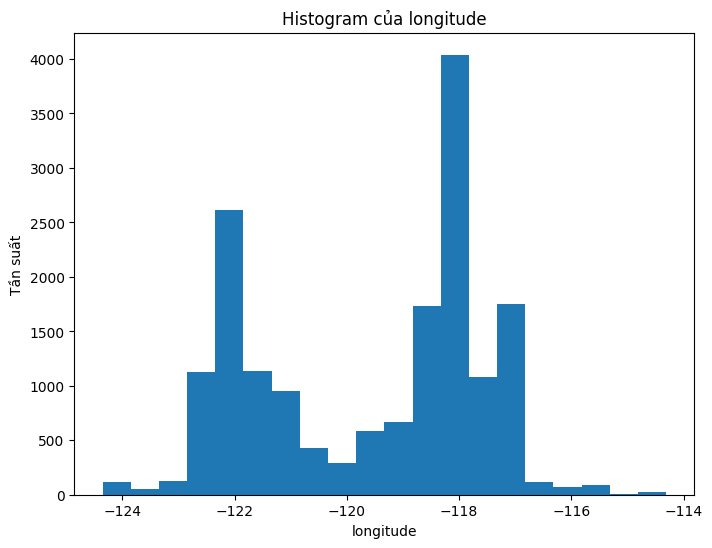

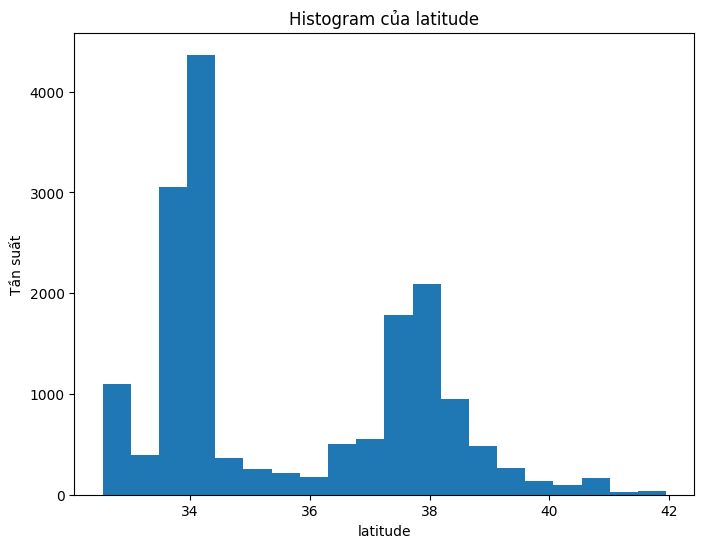

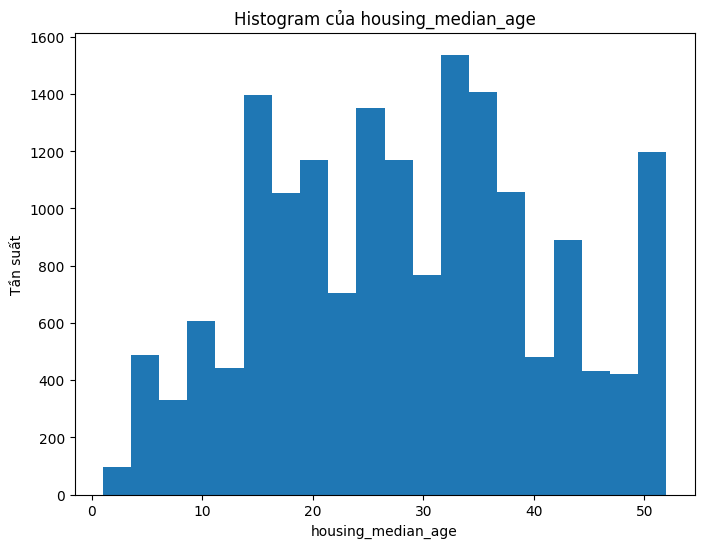

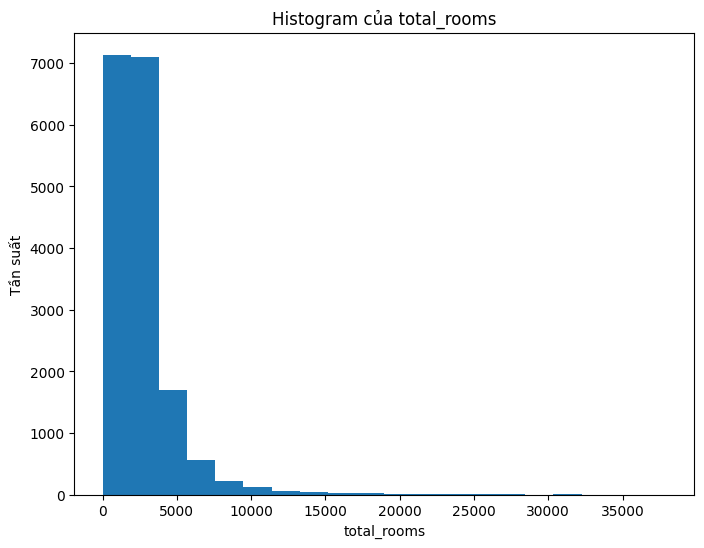

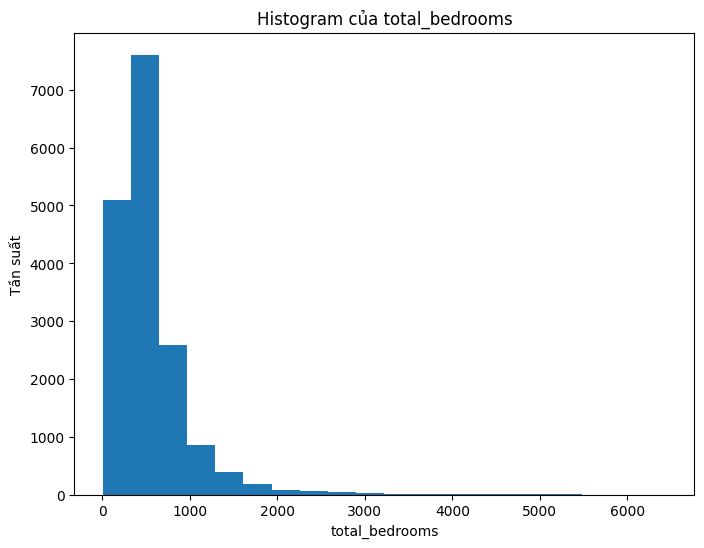

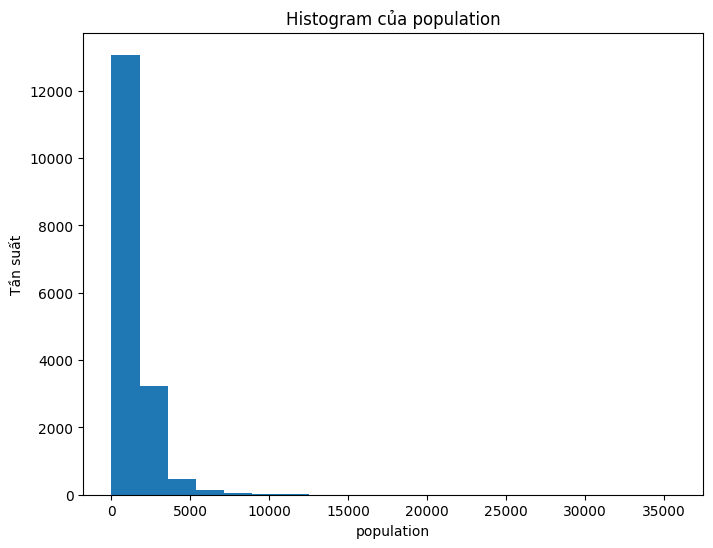

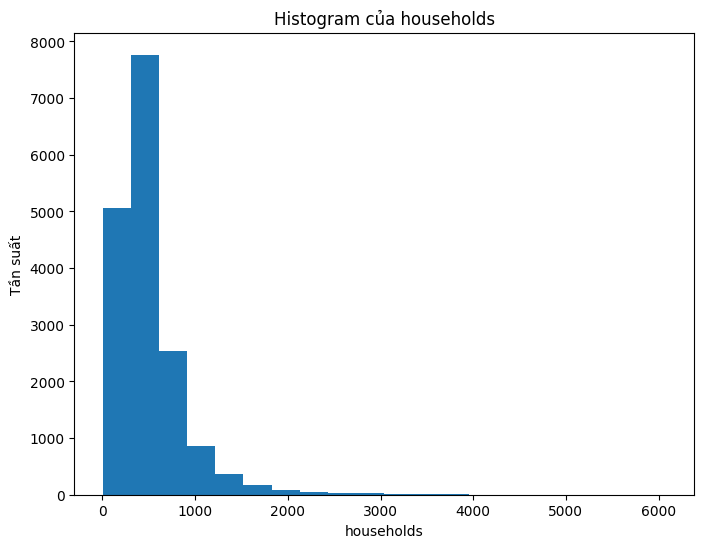

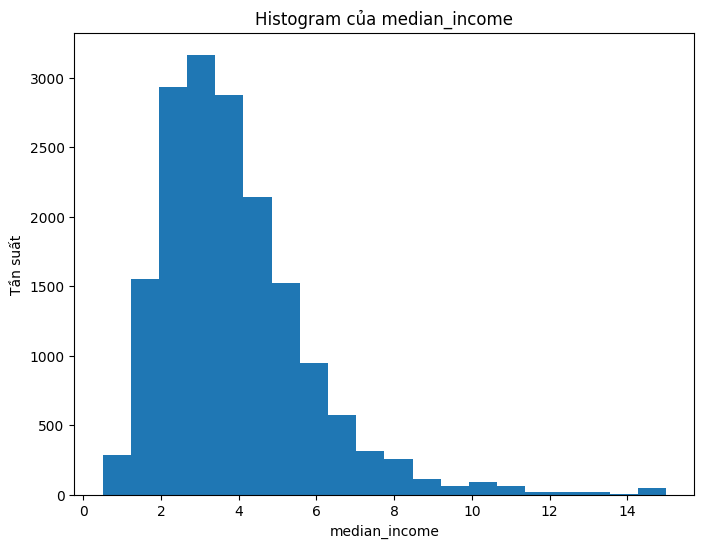

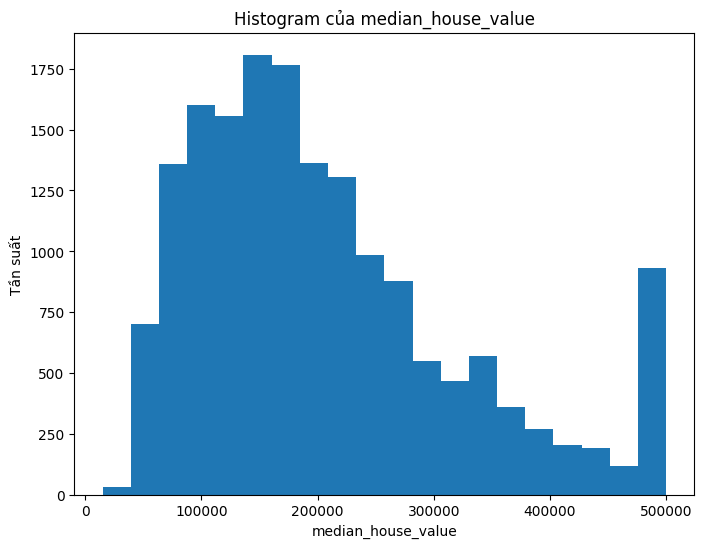

In [5]:
import matplotlib.pyplot as plt

# Lấy ra các cột dạng số
numerical_cols = data.select_dtypes(include=['number']).columns

# Vẽ histogram cho từng cột
for col in numerical_cols:
    plt.figure(figsize=(8, 6))  # Tạo một hình mới cho mỗi histogram
    plt.hist(data[col], bins=20)  # Vẽ histogram với 20 bins
    plt.title(f'Histogram của {col}')  # Đặt tiêu đề cho histogram
    plt.xlabel(col)  # Đặt nhãn cho trục x
    plt.ylabel('Tần suất')  # Đặt nhãn cho trục y
    plt.show()  # Hiển thị histogram

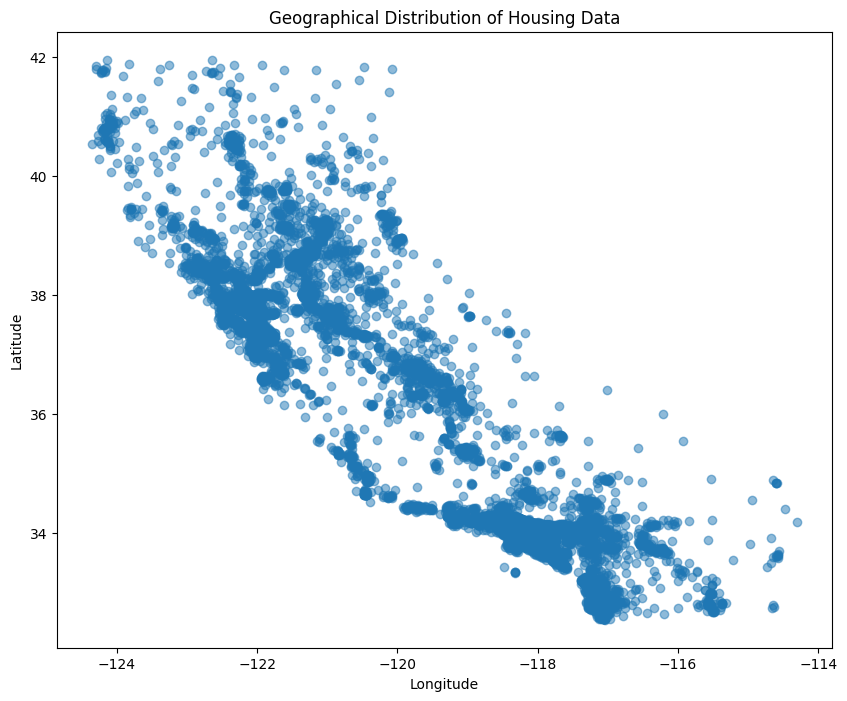

In [6]:
# prompt: Vẽ dữ liệu địa lý bằng hàm plot với dạng đồ thị phân tán scatter

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' DataFrame is already loaded as in the previous code
# If not, uncomment the following line:
# data = pd.read_csv('/content/sample_data/california_housing_train.csv')

# Example using 'longitude' and 'latitude' for geographical plotting
plt.figure(figsize=(10, 8))
plt.scatter(data['longitude'], data['latitude'], alpha=0.5)  # Adjust alpha for transparency
plt.title('Geographical Distribution of Housing Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


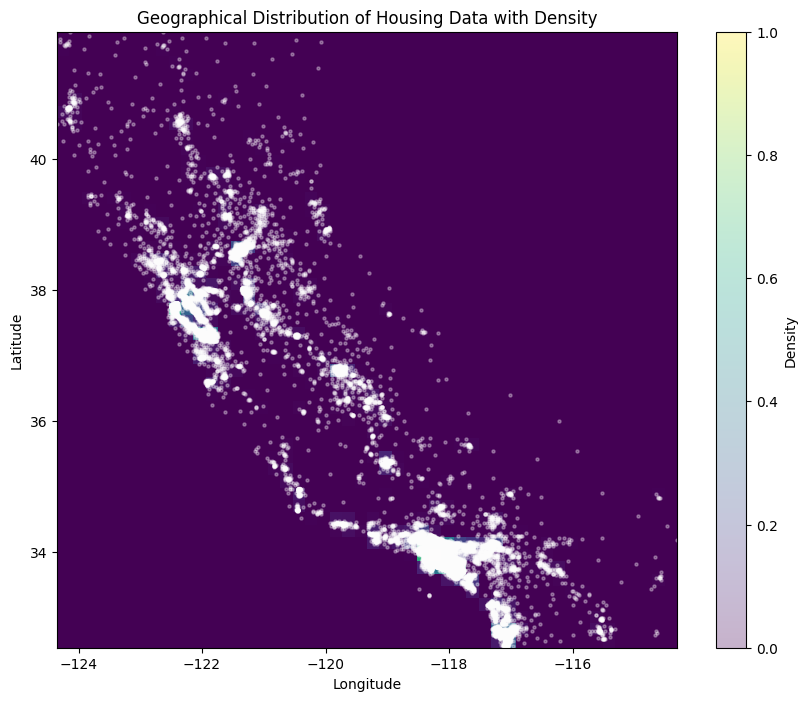

In [7]:
# prompt: làm nổi rõ những vùng có mật độ điểm cao

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' DataFrame is already loaded as in the previous code
# If not, uncomment the following line:
# data = pd.read_csv('/content/sample_data/california_housing_train.csv')

# Example using 'longitude' and 'latitude' for geographical plotting with density highlighting
plt.figure(figsize=(10, 8))

# Calculate the 2D histogram to get density information
heatmap, xedges, yedges = np.histogram2d(data['longitude'], data['latitude'], bins=50)

# Create a pcolormesh plot to visualize density
plt.pcolormesh(xedges, yedges, heatmap.T, cmap='viridis')  # Use a suitable colormap

# Overlay the scatter plot for individual points
plt.scatter(data['longitude'], data['latitude'], alpha=0.3, s=5, c='white')  # Adjust alpha and s for visibility

plt.title('Geographical Distribution of Housing Data with Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Density')  # Add colorbar to show density scale
plt.show()


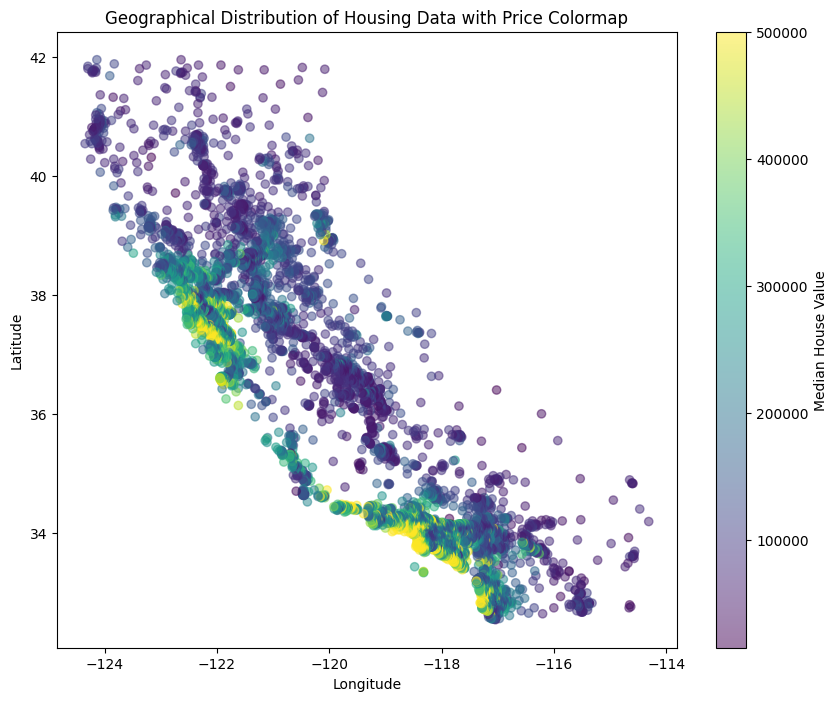

In [8]:
# prompt: dùng thêm bản đồ màu cho giá nhà trung bình (TH-t57). Màu
# xanh: giá thấp, màu đỏ: giá cao.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' DataFrame is already loaded as in the previous code
# If not, uncomment the following line:
# data = pd.read_csv('/content/sample_data/california_housing_train.csv')

plt.figure(figsize=(10, 8))

# Create the scatter plot with color mapping based on median house value
plt.scatter(data['longitude'], data['latitude'], c=data['median_house_value'], cmap='viridis', alpha=0.5)

plt.title('Geographical Distribution of Housing Data with Price Colormap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Median House Value')  # Add colorbar to show price scale
plt.show()


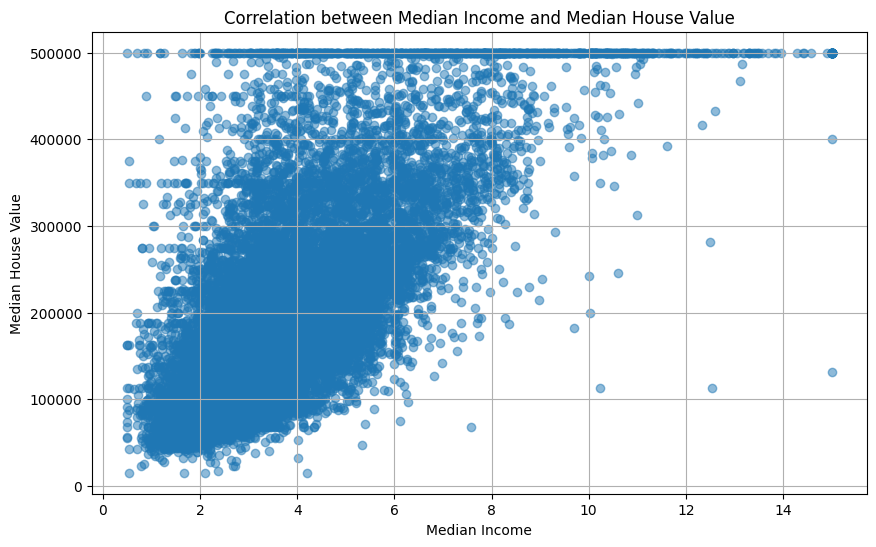

In [9]:
# prompt: Tương quan giữa thu nhập trung bình và giá nhà trung bình

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' DataFrame is already loaded as in the previous code
# If not, uncomment the following line:
# data = pd.read_csv('/content/sample_data/california_housing_train.csv')

plt.figure(figsize=(10, 6))
plt.scatter(data['median_income'], data['median_house_value'], alpha=0.5)
plt.title('Correlation between Median Income and Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.grid(True)
plt.show()


In [10]:
# prompt: tạo các thuộc tính kết hợp: số phòng/người, số phòng ngủ/số phòng, ...

# Create new features
data['rooms_per_person'] = data['total_rooms'] / data['population']
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']
data['population_per_household'] = data['population'] / data['households']

# Display the updated DataFrame with new features
print(data.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  \
0      1015.0       472.0         1.4936             66900.0   
1      1129.0       463.0         1.8200             80100.0   
2       333.0       117.0         1.6509             85700.0   
3       515.0       226.0         3.1917             73400.0   
4       624.0       262.0         1.9250             65500.0   

   rooms_per_person  bedrooms_per_room  population_per_household  
0          5.529064           0.228617                  2.150424  
1          6.775908           

Correlation of features with Median House Value:
longitude                  -0.044982
latitude                   -0.144917
housing_median_age          0.106758
total_rooms                 0.130991
total_bedrooms              0.045783
population                 -0.027850
households                  0.061031
median_income               0.691871
rooms_per_person            0.206969
bedrooms_per_room          -0.258190
population_per_household   -0.042764
Name: median_house_value, dtype: float64


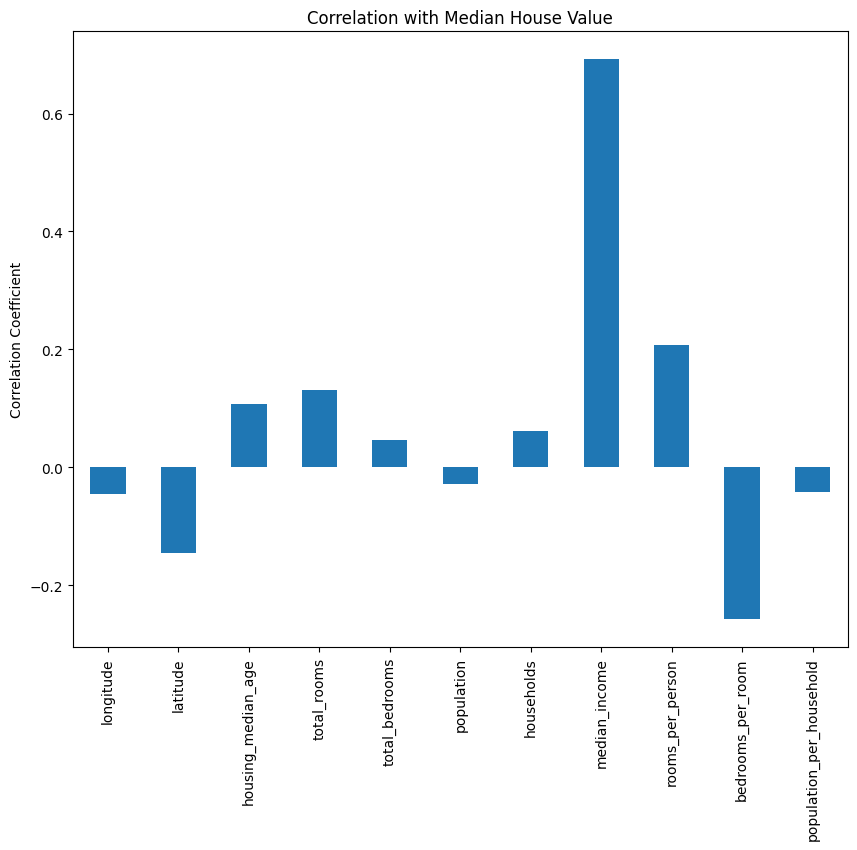

In [12]:
# prompt: Tính hệ số tương quan của các thuộc tính kết hợp với giá nhà\

import pandas as pd
import matplotlib.pyplot as plt
# Assuming 'data' DataFrame is already loaded and new features are created as in the previous code
# If not, uncomment the following lines:
# data = pd.read_csv('/content/sample_data/california_housing_train.csv')
# data['rooms_per_person'] = data['total_rooms'] / data['population']
# data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']
# data['population_per_household'] = data['population'] / data['households']

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Get the correlation with 'median_house_value'
correlation_with_price = correlation_matrix['median_house_value'].drop('median_house_value')  # Exclude self-correlation

# Print the correlations
print("Correlation of features with Median House Value:")
print(correlation_with_price)

# Optionally, visualize the correlations
plt.figure(figsize=(10, 8))
correlation_with_price.plot(kind='bar')
plt.title('Correlation with Median House Value')
plt.ylabel('Correlation Coefficient')
plt.show()


In [17]:
from sklearn.model_selection import train_test_split

X = data.drop('median_house_value', axis=1)  # Các đặc trưng (features)
y = data['median_house_value']  # Biến mục tiêu (target variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  #chuẩn hóa
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [21]:
model.fit(X_train, y_train)

LinearRegression()

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"y_pred: {y_pred}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

y_pred: [144453.54165094 399453.17078211  78003.246014   ...  47325.87520886
 288629.59022455 144761.97810758]
Mean Squared Error: 4497103867.419298
R-squared: 0.6736226566024233


In [28]:
from sklearn.metrics import r2_score, mean_squared_error

# Dự đoán giá nhà trên tập kiểm tra
y_pred = model.predict(X_test)

# Tính R-squared
r2 = r2_score(y_test, y_pred)

# Tính MSE và RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R-squared: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

R-squared: 0.6736226566024233
MSE: 4497103867.419298
RMSE: 67060.44935294795


In [32]:
rooms_per_person = 880 / 100
bedrooms_per_room = 129 / 880
population_per_household = 322 / 126
new_data = [[-122.23, 37.88, 41, 880, 129, 322, 126, 8.3252,  rooms_per_person, bedrooms_per_room, population_per_household]]
predicted_price = model.predict(new_data)

print(f"Gia du doan: {predicted_price}")

Gia du doan: [2735847.717238]
